# Nettoyage des données et préparation pour l'analyse

Cette étape de nettoyage vise à préparer le jeu de données pour les analyses subséquentes. Elle comprend la gestion des valeurs manquantes dans la colonne Income en les remplaçant par la moyenne, la conversion de la date d'inscription des clients (Dt_Customer) en un format approprié, et la création de nouvelles variables clés. Ces nouvelles variables, ou caractéristiques, incluent le calcul de l'âge des clients, leur ancienneté au sein de l'entreprise, le total de leurs dépenses et de leurs achats. Enfin, les données sont encodées pour rendre les variables textuelles (Education, Marital_Status) compatibles avec les algorithmes de clustering, tout en excluant les enregistrements qui pourraient fausser l'analyse.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('Camp_Market.csv', sep=';')

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

df['Income'] = df['Income'].fillna(df['Income'].mean())

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2015 - df['Year_Birth']

df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spending'] = df[spending_cols].sum(axis=1)

purchase_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumDealsPurchases'
]
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

df['Dependents'] = df['Kidhome'] + df['Teenhome']

df = df[df['Age'] < 100]

df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

print("\nNettoyage des données et ingénierie des fonctionnalités terminés.")
df_encoded.info()

In [11]:
# --- Feature Engineering ---

# Calculate customer's age from birth year
df['Age'] = 2015 - df['Year_Birth']

# Calculate the number of days since the customer's enrollment with the company
df['Tenure_Days'] = (pd.to_datetime('2015-01-01') - df['Dt_Customer']).dt.days

# Calculate total spending and total purchases
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spending'] = df[spending_cols].sum(axis=1)

purchase_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumDealsPurchases'
]
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Calculate total number of children at home
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Remove rows with absurd age (e.g., Year_Birth before 1900)
df = df[df['Age'] < 100]

# Create dummy variables for categorical features for clustering
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

print("Data Preparation Complete.")
print("Updated DataFrame Info:")
df_encoded.info()

Data Preparation Complete.
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2237 non-null   int64         
 1   Year_Birth               2237 non-null   int64         
 2   Income                   2237 non-null   float64       
 3   Kidhome                  2237 non-null   int64         
 4   Teenhome                 2237 non-null   int64         
 5   Dt_Customer              2237 non-null   datetime64[ns]
 6   Recency                  2237 non-null   int64         
 7   MntWines                 2237 non-null   int64         
 8   MntFruits                2237 non-null   int64         
 9   MntMeatProducts          2237 non-null   int64         
 10  MntFishProducts          2237 non-null   int64         
 11  MntSweetProducts         2237 non-null   int64   

In [12]:
df = pd.read_csv('Camp_Market.csv', delimiter=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

On voit qu'il manque 24 valeurs dans la colonne Income

In [14]:
df.iloc[0]

ID                           5524
Year_Birth                   1957
Education              Graduation
Marital_Status             Single
Income                    58138.0
Kidhome                         0
Teenhome                        0
Dt_Customer            2012-09-04
Recency                        58
MntWines                      635
MntFruits                      88
MntMeatProducts               546
MntFishProducts               172
MntSweetProducts               88
MntGoldProds                   88
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Name: 0, dtype

Cette analyse nous permet de comprendre le type de features que nous avons

In [15]:
df['Z_Revenue'].unique()

array([11])

In [16]:
df['Z_CostContact'].unique()

array([3])

Z_Revenue et Z_CostContact ne contiennent seulement 11 et 3 valeurs uniques respectivement, elles ne semblent donc pas contribuer fondamentalement à notre analyse

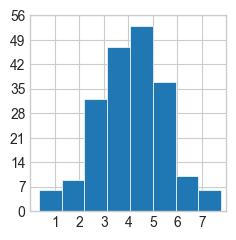

In [17]:
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

<Axes: >

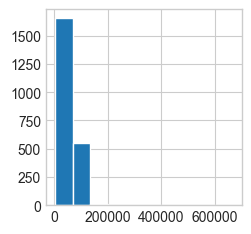

In [18]:
df['Income'].hist()

<Axes: xlabel='Education'>

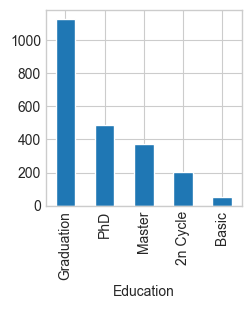

In [19]:
df['Education'].value_counts().plot(kind='bar')

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income', y='Total_Spending')  # no cluster yet
sns.despine(left=True)
plt.show()

ValueError: Could not interpret value `Total_Spending` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [ ]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

Calculer le total de dépense par client et le total d'achat par client puis visualiser la distribution : 

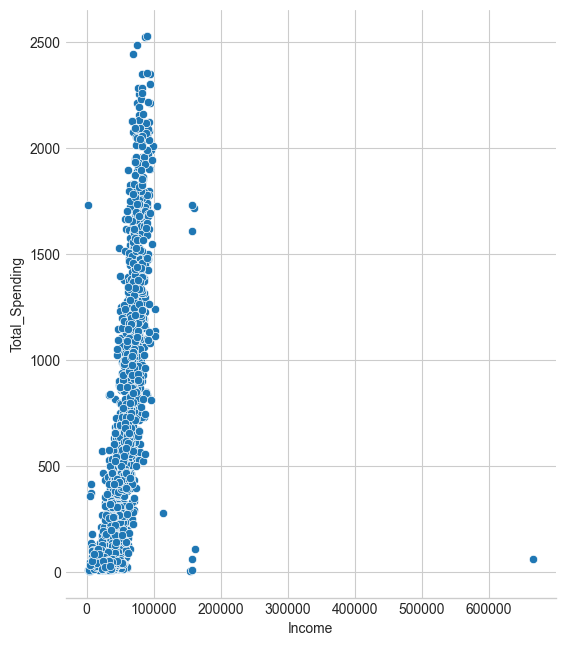

In [ ]:
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

plt.figure(figsize=(5, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending')
sns.despine(left=True)
plt.show()

# Feature nombre d'achats 

Calculer le nombre d'achat par client 

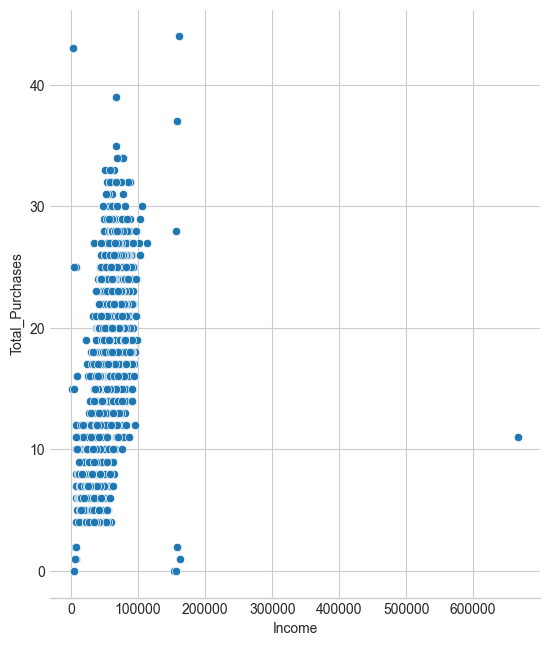

In [21]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

plt.figure(figsize=(5, 6))
sns.scatterplot(data=df, x='Income', y='Total_Purchases')
sns.despine(left=True)
plt.show()
